<a href="https://colab.research.google.com/github/gangapurambhargav/may-2021-ml/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> DIABETES CASE STUDY




# Import Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data


In [ ]:
diab = pd.read_csv('diabetes.csv')
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


------------------------------------------------------------------------

------------------------------------------------------------------------


------------------------------------------------------------------------

# INFO


In [ ]:
diab.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Describe

In [ ]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


------------------------------------------------------------------------


------------------------------------------------------------------------

------------------------------------------------------------------------

# Check Null Values

In [ ]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Check Correlation & Generate Heatmap

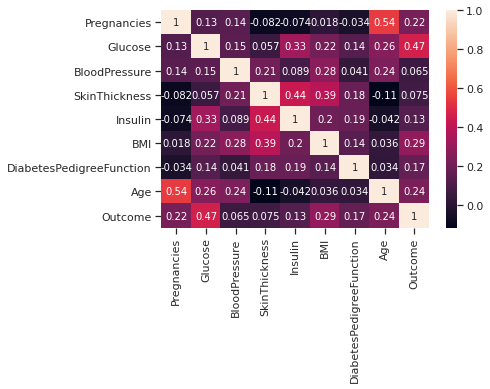

In [ ]:
corr = diab.corr()
sns.heatmap(corr, annot=True)

# Split the Dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
x = diab.drop(['Outcome'], axis = 1)
y = diab['Outcome']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Plot Pair Plot

In [ ]:
sns.pairplot(diab, hue='Outcome')

NameError: ignored

# Apply Model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)
y_pred=model.predict(X_test)

# Check Accuracy of the Model

In [ ]:
from sklearn import metrics
print("The accuracy of the model at k=12 is ", metrics.accuracy_score(y_test, y_pred),)

The accuracy of the model at k=12 is  0.7402597402597403


# Check Best K Value

Minimum error :- 0.2554112554112554 at K = 12


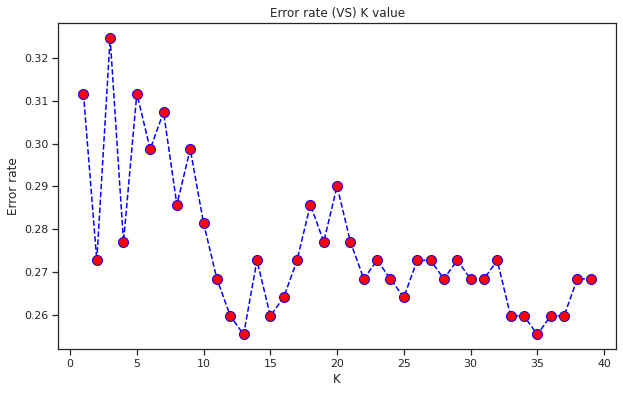

In [ ]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i =knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40),error_rate, color ='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate (VS) K value')
plt.xlabel('K')
plt.ylabel('Error rate')
print('Minimum error :-',min(error_rate),'at K =',error_rate.index(min(error_rate)))

# Conclusion

**The Maximum accuracy is 0.74%**

**Based on the initial look at the data, it is unsurprising that Glucose, BMI, and Age were important in understanding if a patient has diabetes**

In this case study, we looked at predicting diabetes for 768 patients. There was a reasonable amount of class imbalance with just under 35% of patients having diabetes. There were no missing data, and initial looks at the data showed it would be difficult to separate patients with diabetes from those that did not have diabetes.